In [2]:
%matplotlib notebook

In [3]:
# Import Dependencies Libraries
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from pylab import rcParams
from pandas import Series
import datetime
from scipy.stats import linregress
from sklearn import datasets

In [4]:
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [5]:
sns.set(font_scale=1.5, style="whitegrid")

In [6]:
#Read in the China Data CSV to Dataframe
from pandas import read_csv
China_data_df_mo = read_csv('china.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
#Split the Date column into Year to Merge on Year
China_data_df_mo[["Month", "Day", "Year"]] = China_data_df_mo["Month/Date"].str.split("/", expand=True)  
China_data_df_mo

,China -Online Retail Sales Accumulated(in billion $US dollars),China - Online Retail Sales in Goods Accumulated(in billion $US dollars),China - Total Retail Sales of Consumer Goods Current Period(in billion $US dollars),China - Total Retail Sales of Consumer Goods Accumulated (in billion $US dollars),China - Total Retail Sales of Consumer Goods Growth Rate (The same period last year=100)(%),China - Total Retail Sales of Consumer Goods Accumulated Growth Rate (%),China - Total Retail Sales of Consumer Goods Growth Rate (The same period last year=100)(%).1,China - Online Retail Sales Accumulated Growth Rate(%),China - Online Retail Sales in Goods Accumulated Growth Rate(%),China - Online Retail Sales in Food Accumulated Growth Rate(%),China - Online Retail Sales in Clothing Accumulated Growth Rate(%),China - Online Retail Sales in Necessities Accumulated Growth Rate(%),Month/Date,China -Online Retail Sales Accumulated(in billion $US dollars)2,Month,Day,Year
Binning group#,,,,,,,,,,,,,,,,,
y_2010,NaN,NaN,181.253274,1812.532740,1812.532740,1.995224,1.995224,NaN,NaN,NaN,NaN,NaN,1/1/2010,NaN,1,1,2010
y_2010,NaN,NaN,175.782085,1757.820847,3570.353587,3.149604,2.551036,NaN,NaN,NaN,NaN,NaN,2/1/2010,NaN,2,1,2010
y_2010,73.0,NaN,161.352340,1613.523397,5183.876984,2.565288,2.551036,NaN,NaN,NaN,NaN,NaN,3/1/2010,73.000000,3,1,2010
y_2010,NaN,NaN,164.041617,1640.416166,6824.293150,2.636546,2.579540,NaN,NaN,NaN,NaN,NaN,4/1/2010,NaN,4,1,2010
y_2010,NaN,NaN,177.505103,1775.051032,8599.344182,2.665049,2.593791,NaN,NaN,NaN,NaN,NaN,5/1/2010,NaN,5,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
y_2020,NaN,160.091073,NaN,NaN,7429.330577,NaN,-2.921578,-0.427548,0.427548,3.762422,-2.579540,1.068870,2/1/2020,195.417939,2,1,2020
y_2020,NaN,264.163382,376.953395,3769.533948,11198.864530,-2.251753,-2.707804,-0.114013,0.840844,4.660273,-2.151992,1.425160,3/1/2020,315.940870,3,1,2020
y_2020,NaN,366.992952,401.578734,4015.787345,15214.651870,-1.068870,-2.308759,0.242277,1.225638,5.230337,-1.710192,1.767198,4/1/2020,437.495617,4,1,2020


In [7]:
#Read in Germany_Global Data
German_results_df = read_csv('Germany_glob.csv')
#German_results_df

German_results_df[["Month", "Day", "Year"]] = German_results_df["Month/Date"].str.split("/", expand=True)  
German_results_df

,Binning group#,Germany B2C e_Commerce sales (in billion $US dollars),China - Total Retail Sales of Consumer Goods Current Period(in billion $US dollars),China -Online Retail Sales Accumulated(in billion $US dollars),Global retail e-commerce sales (in billion $US dollars),US Retail e-commerce sales (billion $US dollars),Month/Date,Global GDP (billion $US dollars),Month,Day,Year
0,y_2010,18.30,2202.637511,73.00,572,165.40,12/31/2010,6611.0,12,31,2010
1,y_2011,20.20,2578.258381,121.00,680,NaN,12/31/2011,6819.0,12,31,2011
2,y_2012,24.40,2472.625522,190.00,893,NaN,12/31/2012,6991.0,12,31,2012
3,y_2013,28.00,2801.438437,296.57,1088,262.51,12/31/2013,7177.0,12,31,2013
4,y_2014,32.00,3136.966706,450.00,1316,NaN,12/31/2014,7381.0,12,31,2014
5,y_2015,35.60,3604.774051,589.00,"1,336",NaN,12/31/2015,7594.0,12,31,2015
6,y_2016,39.90,3981.983975,770.00,"1,548",NaN,12/31/2016,7790.0,12,31,2016
7,y_2017,44.20,4393.796783,1149.00,"1,845",NaN,12/31/2017,8045.0,12,31,2017
8,y_2018,48.90,4559.160948,1330.00,"2,382",279.72,12/31/2018,8294.0,12,31,2018
9,y_2019,53.30,4925.137761,1552.00,"2,982",309.05,12/31/2019,8500.0,12,31,2019


In [8]:
# Combine the data into a single dataset - outer to display all rows both df
combined_data = pd.merge(China_data_df_mo, German_results_df, how="outer", on = "Year")
combined_data

,China -Online Retail Sales Accumulated(in billion $US dollars)_x,China - Online Retail Sales in Goods Accumulated(in billion $US dollars),China - Total Retail Sales of Consumer Goods Current Period(in billion $US dollars)_x,China - Total Retail Sales of Consumer Goods Accumulated (in billion $US dollars),China - Total Retail Sales of Consumer Goods Growth Rate (The same period last year=100)(%),China - Total Retail Sales of Consumer Goods Accumulated Growth Rate (%),China - Total Retail Sales of Consumer Goods Growth Rate (The same period last year=100)(%).1,China - Online Retail Sales Accumulated Growth Rate(%),China - Online Retail Sales in Goods Accumulated Growth Rate(%),China - Online Retail Sales in Food Accumulated Growth Rate(%),...,Binning group#,Germany B2C e_Commerce sales (in billion $US dollars),China - Total Retail Sales of Consumer Goods Current Period(in billion $US dollars)_y,China -Online Retail Sales Accumulated(in billion $US dollars)_y,Global retail e-commerce sales (in billion $US dollars),US Retail e-commerce sales (billion $US dollars),Month/Date_y,Global GDP (billion $US dollars),Month_y,Day_y
0,NaN,NaN,181.253274,1812.532740,1812.532740,1.995224,1.995224,NaN,NaN,NaN,...,y_2010,18.30,2202.637511,73.0,572,165.40,12/31/2010,6611.0,12,31
1,NaN,NaN,175.782085,1757.820847,3570.353587,3.149604,2.551036,NaN,NaN,NaN,...,y_2010,18.30,2202.637511,73.0,572,165.40,12/31/2010,6611.0,12,31
2,73.0,NaN,161.352340,1613.523397,5183.876984,2.565288,2.551036,NaN,NaN,NaN,...,y_2010,18.30,2202.637511,73.0,572,165.40,12/31/2010,6611.0,12,31
3,NaN,NaN,164.041617,1640.416166,6824.293150,2.636546,2.579540,NaN,NaN,NaN,...,y_2010,18.30,2202.637511,73.0,572,165.40,12/31/2010,6611.0,12,31
4,NaN,NaN,177.505103,1775.051032,8599.344182,2.665049,2.593791,NaN,NaN,NaN,...,y_2010,18.30,2202.637511,73.0,572,165.40,12/31/2010,6611.0,12,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,y_2021,65.12,NaN,NaN,"4,206",374.38,12/31/2021,8485.0,12,31
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,y_2022,NaN,NaN,NaN,"4,927",407.07,12/31/2022,NaN,12,31
128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,y_2023,NaN,NaN,NaN,"5,695",436.12,12/31/2023,NaN,12,31
129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,y_2024,NaN,NaN,NaN,"6,542",459.85,12/31/2024,NaN,12,31


In [9]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
reduced_df = combined_data[["Year", "China -Online Retail Sales Accumulated(in billion $US dollars)_x", "China - Total Retail Sales of Consumer Goods Current Period(in billion $US dollars)_x",
                       "Germany B2C e_Commerce sales (in billion $US dollars)", "Global retail e-commerce sales (in billion $US dollars)", "US Retail e-commerce sales (billion $US dollars)", "Binning group#"]]
reduced_df

,Year,China -Online Retail Sales Accumulated(in billion $US dollars)_x,China - Total Retail Sales of Consumer Goods Current Period(in billion $US dollars)_x,Germany B2C e_Commerce sales (in billion $US dollars),Global retail e-commerce sales (in billion $US dollars),US Retail e-commerce sales (billion $US dollars),Binning group#
0,2010,NaN,181.253274,18.30,572,165.40,y_2010
1,2010,NaN,175.782085,18.30,572,165.40,y_2010
2,2010,73.0,161.352340,18.30,572,165.40,y_2010
3,2010,NaN,164.041617,18.30,572,165.40,y_2010
4,2010,NaN,177.505103,18.30,572,165.40,y_2010
...,...,...,...,...,...,...,...
126,2021,NaN,NaN,65.12,"4,206",374.38,y_2021
127,2022,NaN,NaN,NaN,"4,927",407.07,y_2022
128,2023,NaN,NaN,NaN,"5,695",436.12,y_2023
129,2024,NaN,NaN,NaN,"6,542",459.85,y_2024


In [10]:
#Create summary table grouping monthly China data into Years
summarystats = pd.DataFrame(reduced_df.groupby("Year").count())
summarystats

,China -Online Retail Sales Accumulated(in billion $US dollars)_x,China - Total Retail Sales of Consumer Goods Current Period(in billion $US dollars)_x,Germany B2C e_Commerce sales (in billion $US dollars),Global retail e-commerce sales (in billion $US dollars),US Retail e-commerce sales (billion $US dollars),Binning group#
Year,,,,,,
2010,1,12,12,12,12,12
2011,1,12,12,12,0,12
2012,1,10,12,12,0,12
2013,1,10,12,12,12,12
2014,1,10,12,12,0,12
2015,1,10,12,12,0,12
2016,1,10,12,12,0,12
2017,1,10,12,12,0,12
2018,1,10,12,12,12,12


In [11]:
#Use groupby to create summary stats based on year; add results into columns in summary table
summarystats["Mean"] = pd.DataFrame(combined_data.groupby("Year")["China -Online Retail Sales Accumulated(in billion $US dollars)_x"].mean())
summarystats["Median"] = pd.DataFrame(combined_data.groupby("Year")["China -Online Retail Sales Accumulated(in billion $US dollars)_x"].median())
summarystats["Standard Deviation"] = pd.DataFrame(combined_data.groupby("Year")["China -Online Retail Sales Accumulated(in billion $US dollars)_x"].std())
summarystats["Variance"] = pd.DataFrame(combined_data.groupby("Year")["China -Online Retail Sales Accumulated(in billion $US dollars)_x"].var())
summarystats["SEM"] = pd.DataFrame(combined_data.groupby("Year")["China -Online Retail Sales Accumulated(in billion $US dollars)_x"].sem())
summarystats

#Display 5 summarystats (mean, median, stand dev, var, SEM and keep Year column
summarystats = summarystats[["Binning group#", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]
summarystats

,Binning group#,Mean,Median,Standard Deviation,Variance,SEM
Year,,,,,,
2010,12,73.00,73.00,NaN,NaN,NaN
2011,12,121.00,121.00,NaN,NaN,NaN
2012,12,190.00,190.00,NaN,NaN,NaN
2013,12,296.57,296.57,NaN,NaN,NaN
2014,12,450.00,450.00,NaN,NaN,NaN
2015,12,589.00,589.00,NaN,NaN,NaN
2016,12,770.00,770.00,NaN,NaN,NaN
2017,12,1149.00,1149.00,NaN,NaN,NaN
2018,12,1330.00,1330.00,NaN,NaN,NaN


In [12]:
# Generate a bar plot showing the total China retail sales (data avail 2017-2019) 
China_Online_Retail_Sales = summarystats[["Mean"]]
China_Online_Retail_Sales.head

<bound method NDFrame.head of          Mean
Year         
2010    73.00
2011   121.00
2012   190.00
2013   296.57
2014   450.00
2015   589.00
2016   770.00
2017  1149.00
2018  1330.00
2019  1552.00
2020   727.00
2021      NaN
2022      NaN
2023      NaN
2024      NaN
2025      NaN>

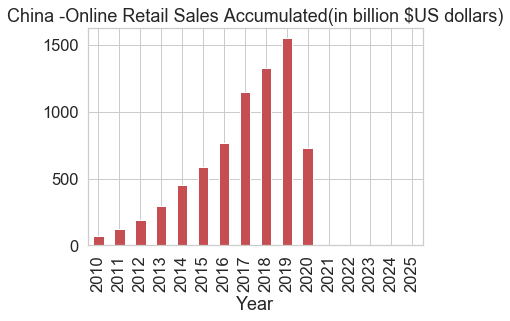

<Figure size 432x288 with 0 Axes>

In [393]:
#Create a bar chart of the data
China_Online_Retail_Sales.plot(kind="bar", figsize=(6,4), color = "r", legend=False)

# Set a title for the chart
plt.title("China -Online Retail Sales Accumulated(in billion $US dollars)")

plt.show()
plt.savefig('China Online Retail Sales 2018 - 2020')
plt.tight_layout()

In [394]:
summarystats2 = pd.DataFrame(reduced_df.groupby("Year").count())
#summarystats2

In [395]:
#Use groupby to create summary stats based on year; add results into columns in summary table
summarystats2["Mean"] = pd.DataFrame(combined_data.groupby("Year")["China - Total Retail Sales of Consumer Goods Accumulated (in billion $US dollars)"].mean())
summarystats2

,China -Online Retail Sales Accumulated(in billion $US dollars)_x,China - Total Retail Sales of Consumer Goods Current Period(in billion $US dollars)_x,Germany B2C e_Commerce sales (in billion $US dollars),Global retail e-commerce sales (in billion $US dollars),US Retail e-commerce sales (billion $US dollars),Binning group#,Mean
Year,,,,,,,
2010,1,12,12,12,12,12,1835.531259
2011,1,12,12,12,0,12,2148.548651
2012,1,10,12,12,0,12,2472.625522
2013,1,10,12,12,12,12,2801.438437
2014,1,10,12,12,0,12,3136.966706
2015,1,10,12,12,0,12,3604.774051
2016,1,10,12,12,0,12,3981.983975
2017,1,10,12,12,0,12,4393.796783
2018,1,10,12,12,12,12,4559.160948


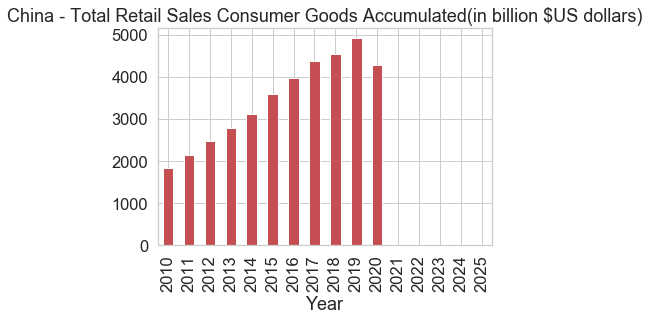

<Figure size 432x288 with 0 Axes>

In [396]:
China_Retail_Sales = summarystats2[["Mean"]]
#China_Retail_Sales

#Create a bar chart of the data
China_Retail_Sales.plot(kind="bar", figsize=(6,4), color = "r", legend=False)

# Set a title for the chart
plt.title("China - Total Retail Sales Consumer Goods Accumulated(in billion $US dollars)")

plt.show()
plt.savefig('China Total Retails Sales 2011 - 2020')
plt.tight_layout()

In [563]:
#Create overlay bar chart of China retail and e-commerce sales
#Create variables for chart
German_results_df.head()

,Binning group#,Germany B2C e_Commerce sales (in billion $US dollars),China - Total Retail Sales of Consumer Goods Current Period(in billion $US dollars),China -Online Retail Sales Accumulated(in billion $US dollars),Global retail e-commerce sales (in billion $US dollars),US Retail e-commerce sales (billion $US dollars),Month/Date,Global GDP (billion $US dollars),Month,Day,Year
0,y_2010,18.3,2202.637511,73.00,572,165.40,12/31/2010,6611.0,12,31,2010
1,y_2011,20.2,2578.258381,121.00,680,NaN,12/31/2011,6819.0,12,31,2011
2,y_2012,24.4,2472.625522,190.00,893,NaN,12/31/2012,6991.0,12,31,2012
3,y_2013,28.0,2801.438437,296.57,1088,262.51,12/31/2013,7177.0,12,31,2013
4,y_2014,32.0,3136.966706,450.00,1316,NaN,12/31/2014,7381.0,12,31,2014


In [556]:
Year = German_results_df["Year"]
China_Online_Retail_Yr = German_results_df["China -Online Retail Sales Accumulated(in billion $US dollars)"]
China_Total_Retail_Yr = German_results_df["China - Total Retail Sales of Consumer Goods Current Period(in billion $US dollars)"]

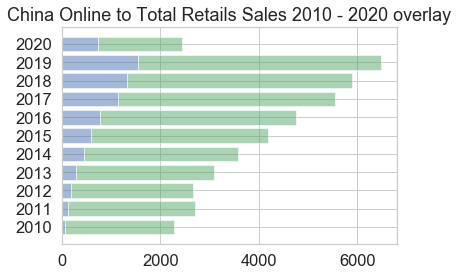

In [466]:
plt.barh(Year, China_Online_Retail_Yr, color="b", alpha=.50, align="center")
plt.barh(Year, China_Total_Retail_Yr, left=China_Online_Retail_Yr, color="g", alpha=.50, align="center")
# Set a title for the chart
plt.title("China Online to Total Retails Sales 2010 - 2020 overlay")
plt.savefig('China Online to Total Retails Sales 2010 - 2020')

In [467]:
Globe_df = read_csv('global.csv', header=0, parse_dates=[0], index_col=0, squeeze=False)
Globe_df

Globe_df[["Month", "Day", "Year"]] = Globe_df["Month/Date"].str.split("/", expand=True)  
Globe_df

# Remove unecessary columns from the DataFrame and save the new DataFrame
reduced_df2 = Globe_df[["Year", "Global GDP (billion $US dollars)", "Global retail e-commerce sales (in billion $US dollars)"]]
reduced_df2.head()

,Year,Global GDP (billion $US dollars),Global retail e-commerce sales (in billion $US dollars)
Index,,,
1,2010,6611,572
2,2011,6819,680
3,2012,6991,893
4,2013,7177,1088
5,2014,7381,1316


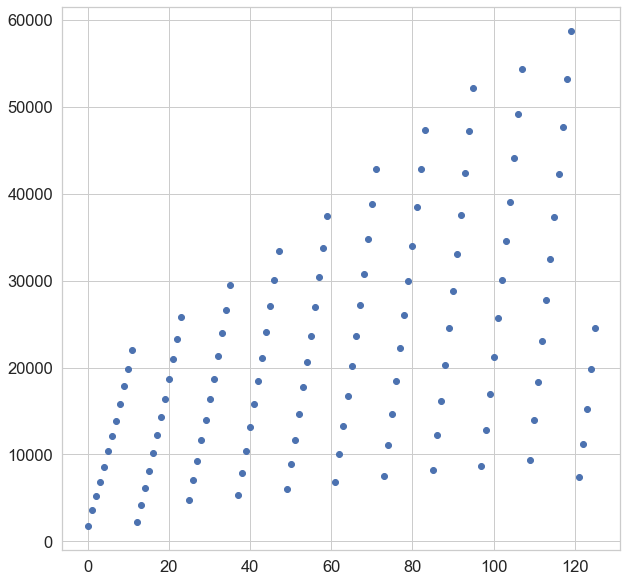

In [551]:
#plot figure
fig, ax = plt.subplots(figsize=(10,10))

#Add x-axis and y-axis
ax.scatter(combined_data.index.values, combined_data['China - Total Retail Sales of Consumer Goods Growth Rate (The same period last year=100)(%)'])
plt.savefig('China - Total Retail Sales of Consumer Goods Growth Rate')

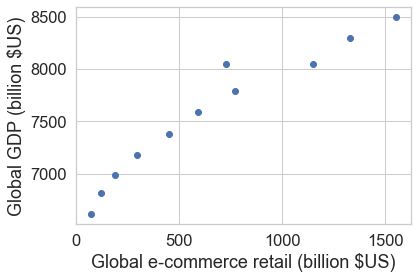

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a scatter plot of Global e-commerce Sales versus Global GDP growth
plt.scatter(German_results_df.iloc[:,3],German_results_df.iloc[:,7])
plt.xlabel('Global e-commerce retail (billion $US)')
plt.ylabel('Global GDP (billion $US)')
plt.show()
plt.savefig('Global e-Commerce Sales vs Global GDP 2011 - 2022')

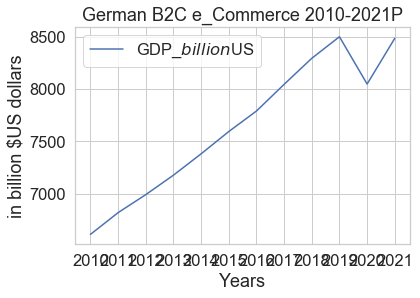

<Figure size 432x288 with 0 Axes>

In [508]:
# Plot our line that will be used to visualize German B2C e_Commerce_Sales
#create variable
German_B2C_eSales= German_results_df["Germany B2C e_Commerce sales (in billion $US dollars)"]

# Plot our line that will be used to track Global GDP over the years
plt.plot(Year, Global_GDP, color="b", label="GDP_$ billion $US")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("German B2C e_Commerce 2010-2021P")
plt.xlabel("Years")
plt.ylabel("in billion $US dollars")
# Print our chart to the screen
plt.show()
plt.savefig('German B2C e_Commerce 2010-2021')

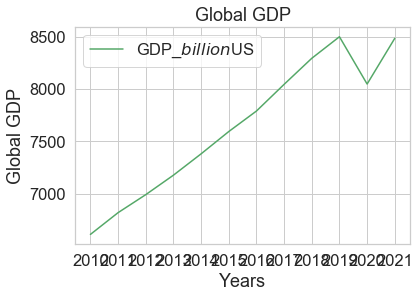

<Figure size 432x288 with 0 Axes>

In [510]:
#Create variable
Global_GDP= German_results_df["Global GDP (billion $US dollars)"]

# Plot our line that will be used to track Global GDP over the years
plt.plot(Year, Global_GDP, color="g", label="GDP_$ billion $US")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Global GDP")
plt.xlabel("Years")
plt.ylabel("Global GDP")
# Print our chart to the screen
plt.show()
plt.savefig('Global Global GDP 201- - 2021')

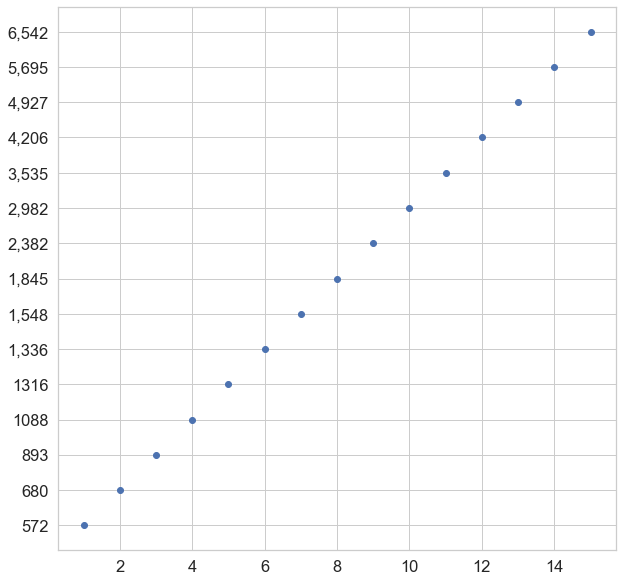

In [576]:
# Plot out Global retail trends
#plot figure
fig, ax = plt.subplots(figsize=(10,10))

#Add x-axis and y-axis
ax.scatter(Globe_df.index.values, Globe_df['Global retail e-commerce sales (in billion $US dollars)'])
plt.savefig('Global e_Commerce Sales trends 2010-2024')

In [ ]:
# Add the linear regression equation and line to plot
Years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
x_values = German_B2C_eSales["Years"]
y_values = Global_GDP["Years"]

# Perform a linear regression on mouse weight and tumor volume
slope, int, r, p, std_err = st.linregress(German_B2C_eSales, Global_GDP)

# Create equation of line to calculate mouse weight
fit = slope * German_B2C_eSales, Global_GDP + int

# Plot the linear model on top of scatter plot 
plt.scatter(German_B2C_eSales,Global_GDP)
plt.xlabel("in billions $US")
plt.ylabel("in billions $US")
plt.plot(German_B2C_eSales,fit,"--")
plt.xticks(German_B2C_eSales, rotation=90)
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(German_B2C_eSales, Global_GDP)[0],2)
plt.show()

In [351]:
Global_e_Commerce_sales=Globe_df["Global retail e-commerce sales (in billion $US dollars)"]
Global_e_Commerce_sales.head()

Index
1     572
2     680
3     893
4    1088
5    1316
Name: Global retail e-commerce sales (in billion $US dollars), dtype: object

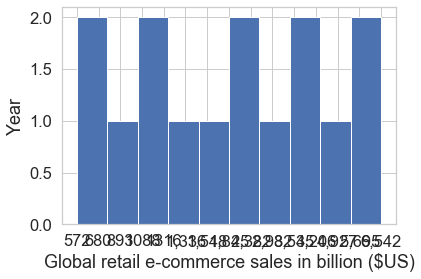

In [451]:
plt.hist(Global_e_Commerce_sales)
plt.xlabel('Global retail e-commerce sales in billion ($US)')
plt.ylabel('Year')
plt.show()

In [ ]:
# Demonstrate calculating the z-scores using SciPy
import scipy.stats as sts
z_scipy = sts.zscore(Global_e_Commerce_sales)
z_scipy

In [453]:
print(combined_data.describe())

       China -Online Retail Sales Accumulated(in billion $US dollars)_x  \
count                                          11.000000                  
mean                                          658.870000                  
std                                           503.733294                  
min                                            73.000000                  
25%                                           243.285000                  
50%                                           589.000000                  
75%                                           959.500000                  
max                                          1552.000000                  

       China - Online Retail Sales in Goods Accumulated(in billion $US dollars)  \
count                                          27.000000                          
mean                                          552.010073                          
std                                           301.791275                   

In [359]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM for each Year (binning group#)
#Create summary table displaying # of data points for each Year
summarystats = pd.DataFrame(combined_data.groupby("Binning group#").count())
summarystats = pd.DataFrame(combined_data.groupby("Binning group#").mean())
summarystats = pd.DataFrame(combined_data.groupby("Binning group#").median())
summarystats

#Rename columns
summarystats = summarystats.rename(columns = {"Online Retail Sales Accumulated(in billion $US dollars)" : "China-Online Retail Sales Accumulated(in billion $US dollars)"})
summarystats

,China -Online Retail Sales Accumulated(in billion $US dollars)_x,China - Online Retail Sales in Goods Accumulated(in billion $US dollars),China - Total Retail Sales of Consumer Goods Current Period(in billion $US dollars)_x,China - Total Retail Sales of Consumer Goods Accumulated (in billion $US dollars),China - Total Retail Sales of Consumer Goods Growth Rate (The same period last year=100)(%),China - Total Retail Sales of Consumer Goods Accumulated Growth Rate (%),China - Total Retail Sales of Consumer Goods Growth Rate (The same period last year=100)(%).1,China - Online Retail Sales Accumulated Growth Rate(%),China - Online Retail Sales in Goods Accumulated Growth Rate(%),China - Online Retail Sales in Food Accumulated Growth Rate(%),China - Online Retail Sales in Clothing Accumulated Growth Rate(%),China - Online Retail Sales in Necessities Accumulated Growth Rate(%),China -Online Retail Sales Accumulated(in billion $US dollars)2,Germany B2C e_Commerce sales (in billion $US dollars),China - Total Retail Sales of Consumer Goods Current Period(in billion $US dollars)_y,China -Online Retail Sales Accumulated(in billion $US dollars)_y,US Retail e-commerce sales (billion $US dollars),Global GDP (billion $US dollars)
Binning group#,,,,,,,,,,,,,,,,,,
y_2010,73.00,NaN,178.322432,1783.224324,11229.662235,2.643672,2.593791,NaN,NaN,NaN,NaN,NaN,73.000000,18.3,2202.637511,73.00,165.40,6611.0
y_2011,121.00,NaN,209.511346,2095.113465,13259.218335,2.458401,2.401395,NaN,NaN,NaN,NaN,NaN,121.000000,20.2,2578.258381,121.00,NaN,6819.0
y_2012,190.00,NaN,237.814311,2378.143115,16323.283830,2.016601,2.037979,NaN,NaN,NaN,NaN,NaN,190.000000,24.4,2472.625522,190.00,NaN,6991.0
y_2013,296.57,NaN,269.159281,2691.592805,18424.112190,1.895463,1.824205,NaN,NaN,NaN,NaN,NaN,296.570000,28.0,2801.438437,296.57,262.51,7177.0
y_2014,450.00,NaN,302.249358,3022.493580,20661.185840,1.695940,1.710192,NaN,NaN,NaN,NaN,NaN,450.000000,32.0,3136.966706,450.00,NaN,7381.0
y_2015,589.00,NaN,350.818811,3508.188108,23645.670400,1.524921,1.496418,NaN,NaN,NaN,NaN,NaN,589.000000,35.6,3604.774051,589.00,NaN,7594.0
y_2016,770.00,NaN,387.622143,3876.221426,26075.553950,1.503544,1.467915,NaN,NaN,NaN,NaN,NaN,770.000000,39.9,3981.983975,770.00,NaN,7790.0
y_2017,1149.00,NaN,428.526372,4285.263724,28785.167910,1.475041,1.467915,NaN,NaN,NaN,NaN,NaN,1149.000000,44.2,4393.796783,1149.00,NaN,8045.0
y_2018,1330.00,519.626162,444.535195,4445.351946,30035.475030,1.268392,1.325399,4.175719,4.147216,6.042678,3.406132,4.232725,682.120055,48.9,4559.160948,1330.00,279.72,8294.0


In [9]:
print(China_data_df_mo.describe())

       Binning group#  \
count          126.00   
mean             5.26   
std              3.05   
min              0.50   
25%              2.50   
50%              5.50   
75%              7.50   
max             10.50   

       Online Retail Sales Accumulated(in billion $US dollars)  \
count                                              27.00         
mean                                              700.48         
std                                               381.57         
min                                               174.89         
25%                                               400.69         
50%                                               682.12         
75%                                               961.50         
max                                             1,515.29         

       Online Retail Sales Accumulated Growth Rate(%)  \
count                                           27.00   
mean                                             2.72   
std     

In [11]:
# Creating a group based off of the bins
df = China_data_df_mo.groupby("Annual Data Summary")
df.max()

,Binning group#,Online Retail Sales Accumulated(in billion $US dollars),Online Retail Sales Accumulated Growth Rate(%),Online Retail Sales in Goods Accumulated(in billion $US dollars),Online Retail Sales in Goods Accumulated Growth Rate(%),Online Retail Sales in Food Accumulated Growth Rate(%),Online Retail Sales in Clothing Accumulated Growth Rate(%),Online Retail Sales in Necessities Accumulated Growth Rate(%),Total Retail Sales of Consumer Goods Current Period(in billion $US dollars),Total Retail Sales of Consumer Goods Accumulated (in billion $US dollars),Total Retail Sales of Consumer Goods Growth Rate (The same period last year=100)(%),Total Retail Sales of Consumer Goods Accumulated Growth Rate (%),Total Retail Sales of Consumer Goods Growth Rate (The same period last year=100)(%).1
Annual Data Summary,,,,,,,,,,,,,
2010,0.50,nan,nan,nan,nan,nan,nan,nan,218.47,"2,184.70","22,026.38",3.15,2.62
2011,1.50,nan,nan,nan,nan,nan,nan,nan,252.82,"2,528.19","25,827.58",2.84,2.84
2012,2.50,nan,nan,nan,nan,nan,nan,nan,289.79,"2,897.95","29,524.57",2.17,2.11
2013,3.50,nan,nan,nan,nan,nan,nan,nan,328.64,"3,286.38","33,402.90",1.95,1.87
2014,4.50,nan,nan,nan,nan,nan,nan,nan,367.71,"3,677.10","37,395.36",1.78,1.72
2015,5.50,nan,nan,nan,nan,nan,nan,nan,408.09,"4,080.89","42,887.45",1.60,1.52
2016,6.50,nan,nan,nan,nan,nan,nan,nan,452.59,"4,525.88","47,360.35",1.55,1.48
2017,7.50,nan,nan,nan,nan,nan,nan,nan,495.02,"4,950.16","52,198.14",1.57,1.48
2018,8.50,"1,283.57",5.32,"1,000.44",5.07,8.17,5.24,4.75,511.54,"5,115.40","54,296.73",1.44,1.40


In [13]:
#Read in Germany_Global Data
German_results_df = read_csv('Germany_glob.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
German_results_df.head()

,Binning group#,Germany B2C e_Commerce sales (in billion $US dollars),Global retail e-commerce sales (in billion $US dollars),US Retail e-commerce sales (billion $US dollars)
Annual Data Summary,,,,
2011-01-01,1.50,20.20,NaN,nan
2012-01-01,2.50,24.40,NaN,nan
2013-01-01,3.50,28.00,NaN,nan
2014-01-01,4.50,32.00,NaN,nan
2015-01-01,5.50,35.60,"1,336",nan


In [ ]:
China_data_df3 = China_data_df_mo.sample(n=100, random_state=120, axis=0)
China_data_df3['Online Retail Sales in Goods Accumulated Growth Rate(%)'].plot()
plt.xlabel=('Date')
plt.ylabel=('Online Retail Sales in Goods Accumulated Growth Rate(%)')
plt.title=('China Ecommerce Trends')

In [544]:
combined_data.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            121, 122, 123, 124, 125, 126, 127, 128, 129, 130],
           dtype='int64', length=131)